# Assignment 1
## Authors:
- Jakub Dębiński, 251501
- Jakub Rychter, 252954

## Overview
The goal of this assignment is to conduct a statistical analysis of a given dataset using Jupyter Notebook.

The dataset contains information about abalone snails and includes 4177 observations described by 9 variables (features).
Among these variables, one is qualitative (sex), while the remaining ones are quantitative.

## Task 1.1

Using the Pandas package, create a table of the distribution of the qualitative variable in the dataset, which should have the following structure:

- rows should represent individual categories
- columns:
    1. category name,
    2. count,
    3. percentage (rounded to two decimal places).

In [1]:
from itertools import combinations

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np

In [2]:
column_names = ["sex", "length [mm]", "diameter [mm]", "height [mm]", "whole weight [g]", "shucked weight [g]", "viscera weight [g]", "shell weight [g]", "rings"]

snails_data_all = pd.read_csv("data.csv", names=column_names)

In [3]:
mapping = {'M': 'Male', 'F': 'Female', 'I': 'Infant'}

mapped_sex = snails_data_all['sex'].map(mapping)

counts = mapped_sex.value_counts().rename_axis(None)

df_qualitative_summary = pd.DataFrame({
    'count': counts,
    '%':(counts / counts.sum() * 100).round(2)
})

df_qualitative_summary

,count,%
Male,1528,36.58
Infant,1342,32.13
Female,1307,31.29


## Task 1.2

Using the Pandas package, create a table with summary statistics for the quantitative variables in the dataset, which should have the following structure:
- rows should represent individual variables;
- columns:
    1. variable name,
    2. arithmetic mean,
    3. standard deviation
    4. minimum value,
    5. 1st quartile,
    6. 2nd quartile (median),
    7. 3rd quartile,
    8. maximum value.

In [4]:
quantitative_values = snails_data_all.select_dtypes(include='number')

df_quantitative_summary = pd.DataFrame({
    'mean':quantitative_values.mean().round(2),
    'std':quantitative_values.std().round(2),
    'min':quantitative_values.min().round(2),
    '25%':quantitative_values.quantile(0.25).round(2),
    '50%':quantitative_values.quantile(0.5).round(2),
    '75%':quantitative_values.quantile(0.7).round(2),
    'max':quantitative_values.max().round(2),
})
df_quantitative_summary

,mean,std,min,25%,50%,75%,max
length [mm],0.52,0.12,0.08,0.45,0.55,0.60,0.82
diameter [mm],0.41,0.10,0.06,0.35,0.42,0.47,0.65
height [mm],0.14,0.04,0.00,0.12,0.14,0.16,1.13
whole weight [g],0.83,0.49,0.00,0.44,0.80,1.08,2.83
shucked weight [g],0.36,0.22,0.00,0.19,0.34,0.47,1.49
viscera weight [g],0.18,0.11,0.00,0.09,0.17,0.23,0.76
shell weight [g],0.24,0.14,0.00,0.13,0.23,0.31,1.00
rings,9.93,3.22,1.00,8.00,9.00,11.00,29.00


## Task 1.3
Using a package chosen among Matplotlib, Pandas, or Seaborn, create a bar chart of the counts of occurrences of each category for the qualitative variable in the dataset.

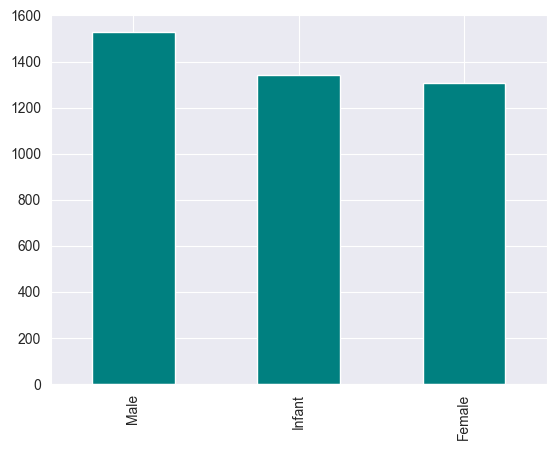

In [5]:
df_qualitative_summary['count'].plot(
    kind='bar',
    color='teal'
);

## Task 1.4
Using a package chosen among Matplotlib, Pandas, or Seaborn, create a histogram of each quantitative variable in the dataset. All histograms should be placed in a single figure spanning 4 rows and 2 columns.

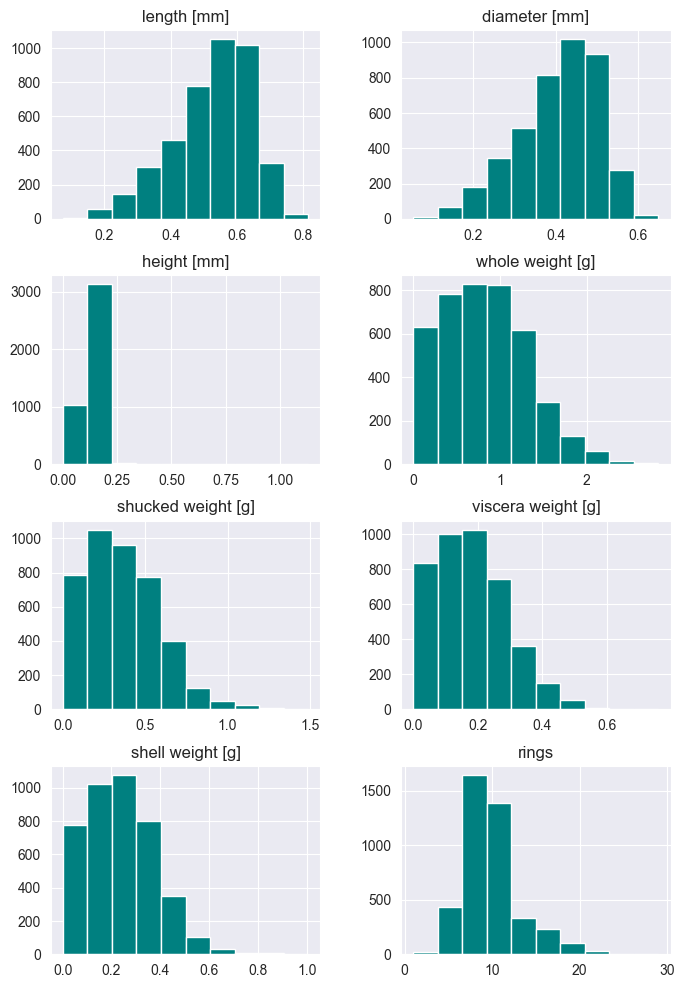

In [6]:
quantitative_values.hist(
    layout=(4, 2),
    figsize=(8, 12),
    color='teal'
);

## Task 1.5
Using a package chosen among Matplotlib, Pandas, or Seaborn, create a scatter plot for each pair of the quantitative variables in the dataset. All scatter plots should be placed in a single figure spanning 14 rows and 2 columns.

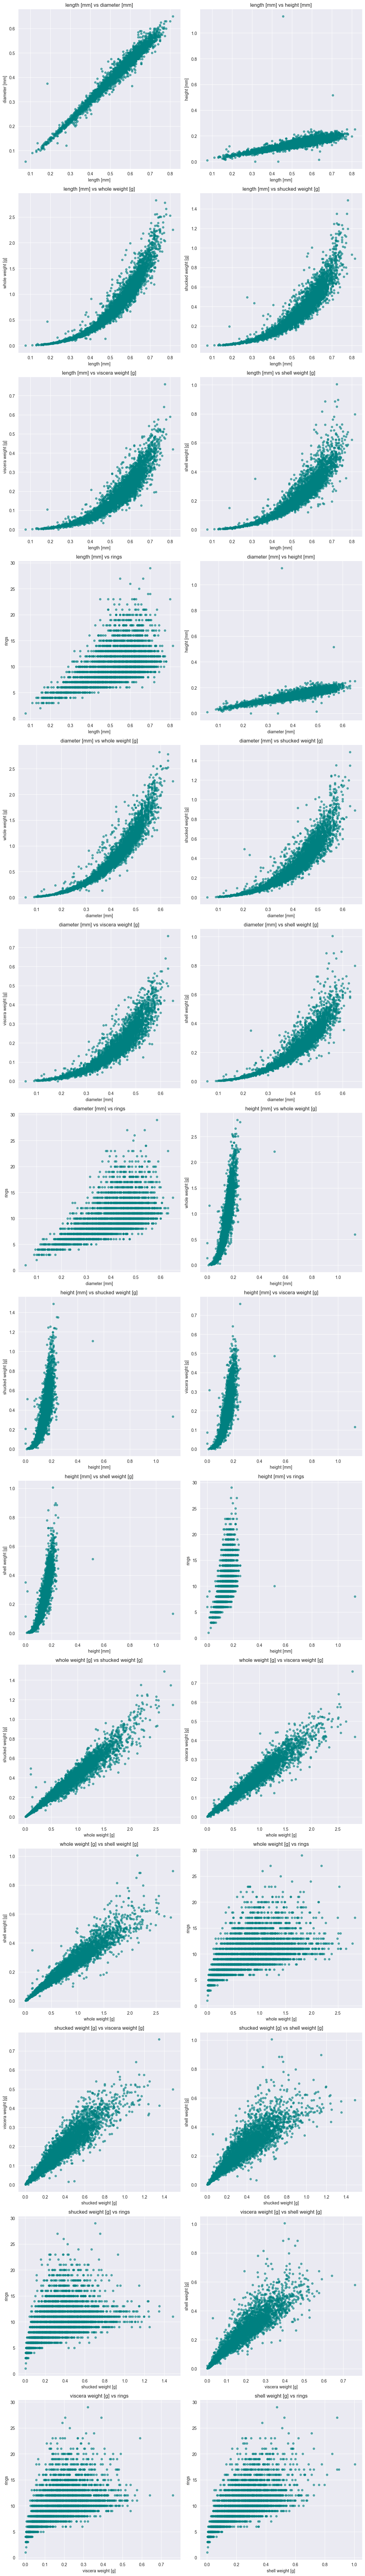

In [7]:
all_quantitative_pairs = (
    list(
        combinations(quantitative_values, 2)
))

fig, axes = plt.subplots(14, 2, figsize=(12, 84))
axes = axes.flatten()

for i, (x_var, y_var) in enumerate(all_quantitative_pairs):
    quantitative_values.plot.scatter(
        x=x_var,
        y=y_var,
        ax=axes[i],
        alpha=0.6,
        color='teal',
        title=f'{x_var} vs {y_var}'
    )

plt.tight_layout()
plt.show()

## Task 1.6

Using the Pandas package, create a table representing a linear correlation matrix of all quantitative variables in the dataset.

In [8]:
corr_matrix = quantitative_values.corr().round(2)

linear_correlation_matrix_table = pd.DataFrame(
    corr_matrix
)

linear_correlation_matrix_table

,length [mm],diameter [mm],height [mm],whole weight [g],shucked weight [g],viscera weight [g],shell weight [g],rings
length [mm],1.00,0.99,0.83,0.93,0.90,0.90,0.90,0.56
diameter [mm],0.99,1.00,0.83,0.93,0.89,0.90,0.91,0.57
height [mm],0.83,0.83,1.00,0.82,0.77,0.80,0.82,0.56
whole weight [g],0.93,0.93,0.82,1.00,0.97,0.97,0.96,0.54
shucked weight [g],0.90,0.89,0.77,0.97,1.00,0.93,0.88,0.42
viscera weight [g],0.90,0.90,0.80,0.97,0.93,1.00,0.91,0.50
shell weight [g],0.90,0.91,0.82,0.96,0.88,0.91,1.00,0.63
rings,0.56,0.57,0.56,0.54,0.42,0.50,0.63,1.00


## Task 1.7
Using the Seaborn package, create a heatmap representing a linear correlation matrix of all quantitative variables in the dataset.

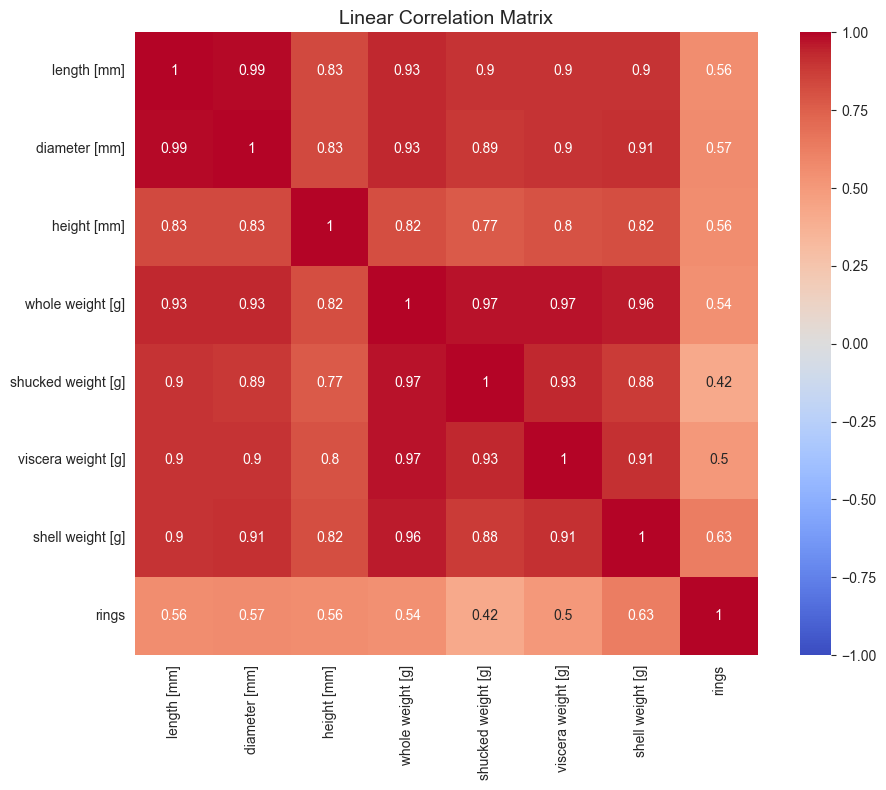

In [9]:
plt.figure(figsize=(10, 8))
sbn.heatmap(
    linear_correlation_matrix_table,
    annot=True,
    cmap='coolwarm',
    center=0,
    vmin=-1, vmax=1,
    square=True
)
plt.title("Linear Correlation Matrix", fontsize=14)
plt.tight_layout()
plt.show()

## Task 1.8
Using the Seaborn package, create a linear regression plot with the two quantitative variables that are most strongly linearly correlated (the variables may be hardcoded).

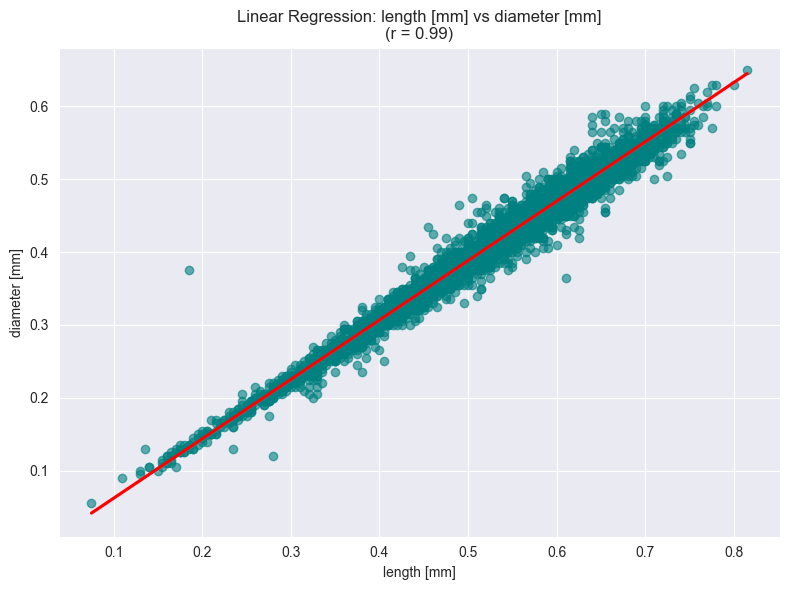

In [10]:
corr_matrix_abs = corr_matrix.abs()
np.fill_diagonal(corr_matrix_abs.values, 0)
max_pair = corr_matrix_abs.stack().idxmax()

x_var, y_var = max_pair


plt.figure(figsize=(8, 6))
sbn.regplot(
    data=quantitative_values,
    x=x_var,
    y=y_var,
    scatter_kws={'alpha': 0.6, 'color': 'teal'},
    line_kws={'color': 'red'}
)
plt.title(f'Linear Regression: {x_var} vs {y_var}\n(r = {corr_matrix.loc[x_var, y_var]:.2f})')
plt.tight_layout()
plt.show()

## Task 2.2
Using the Pandas package, create a table with summary statistics for the quantitative variables in the dataset split by the categories of the qualitative variable, which should have the following structure:
- rows should represent combinations of individual quantitative variables and individual categories of the qualitative variable;
- columns:
    1. quantitative variable name,
    2. qualitative variable category name,
    3. arithmetic mean,
    4. standard deviation,
    5. minimum value,
    6. 1st quartile,
    7. 2nd quartile (median),
    8. 3rd quartile,
    9. maximum value.

In [11]:
grouped_data = snails_data_all.groupby('sex')

mean_series = grouped_data.mean().stack()
std_series = grouped_data.std().stack()
min_series = grouped_data.min().stack()
q25_series = grouped_data.quantile(0.25).stack()
q50_series = grouped_data.quantile(0.50).stack()
q75_series = grouped_data.quantile(0.75).stack()
max_series = grouped_data.max().stack()

df_stats = pd.DataFrame({
    'mean': mean_series,
    'std': std_series,
    'min': min_series,
    '25%': q25_series,
    '50%': q50_series,
    '75%': q75_series,
    'max': max_series
})


df_stats = df_stats.swaplevel(0, 1).sort_index()

df_stats.index.names = ['Feature', 'Sex']

sex_mapping = {
    'F': 'Female',
    'I': 'Infant',
    'M': 'Male'
}

df_stats = df_stats.reset_index()
df_stats['Sex'] = df_stats['Sex'].map(sex_mapping)

df_final = df_stats.set_index(['Feature', 'Sex'])


df_final = df_final.round(2)


df_final


mean   std   min   25%    50%    75%    max
Feature            Sex                                                 
diameter [mm]      Female   0.45  0.07  0.20  0.41   0.46   0.50   0.65
                   Infant   0.33  0.09  0.06  0.27   0.34   0.39   0.55
                   Male     0.44  0.08  0.11  0.40   0.46   0.50   0.63
height [mm]        Female   0.16  0.04  0.02  0.14   0.16   0.18   1.13
                   Infant   0.11  0.03  0.00  0.08   0.11   0.13   0.22
                   Male     0.15  0.03  0.02  0.13   0.16   0.18   0.52
length [mm]        Female   0.58  0.09  0.28  0.52   0.59   0.64   0.82
                   Infant   0.43  0.11  0.08  0.36   0.44   0.51   0.72
                   Male     0.56  0.10  0.16  0.50   0.58   0.63   0.78
rings              Female  11.13  3.10  5.00  9.00  10.00  12.00  29.00
                   Infant   7.89  2.51  1.00  6.00   8.00   9.00  21.00
                   Male    10.71  3.03  3.00  9.00  10.00  12.00  27.00
shell weight [g]   Female   0.30  0.13  0.02  0.21   0.30   0.38   1.00
                   Infant   0.13  0.08  0.00  0.06   0.11   0.18   0.66
                   Male     0.28  0.13  0.00  0.19   0.28   0.36   0.90
shucked weight [g] Female   0.45  0.20  0.03  0.30   0.44   0.57   1.49
                   Infant   0.19  0.13  0.00  0.09   0.17   0.27   0.77
                   Male     0.43  0.22  0.01  0.28   0.42   0.57   1.35
viscera weight [g] Female   0.23  0.10  0.02  0.16   0.22   0.30   0.59
                   Infant   0.09  0.06  0.00  0.04   0.08   0.13   0.44
                   Male     0.22  0.10  0.00  0.15   0.21   0.28   0.76
whole weight [g]   Female   1.05  0.43  0.08  0.73   1.04   1.32   2.66
                   Infant   0.43  0.29  0.00  0.21   0.38   0.60   2.05
                   Male     0.99  0.47  0.02  0.67   0.98   1.27   2.83